In [3]:
import csv

# Path to your CSV file
csv_file = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/transactions(edges)_day.csv'

# Initialize a variable to hold the total number of transactions
total_transactions = 0

# Open and read the CSV file
with open(csv_file, 'r') as file:
    reader = csv.DictReader(file)
    
    # Iterate through each row and sum the 'Number of Transactions' column
    for row in reader:
        total_transactions += int(row['Number of Transactions'])

# Print the total number of transactions
print(f'Total number of transactions: {total_transactions}')


Total number of transactions: 190080636


# No.of Unique Transactions 

In [10]:
import csv

# Path to your CSV file
csv_file = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/new_edges_normal.csv'

# Initialize a variable to hold the total number of new edges
total_new_edges = 0

# Open and read the CSV file
with open(csv_file, 'r') as file:
    reader = csv.DictReader(file)
    
    # Iterate through each row and sum the 'Number of New Edges' column
    for row in reader:
        total_new_edges += int(row['Number of New Edges'])

# Print the total number of new edges
print(f'Total number of new edges: {total_new_edges}')


Total number of new edges: 41434691


# No.of Unique Nodes

In [2]:
import pandas as pd

# Path to your CSV file
file_path = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/new_nodes.csv'

# Load the CSV data into a DataFrame
df = pd.read_csv(file_path)

# Calculate the total sum of the 'Number of New Nodes' column
total_new_nodes = df['Number of New Nodes'].sum()

# Print the result
print(f"Total number of new nodes: {total_new_nodes}")



Total number of new nodes: 7911028


# No.of Tokens 

In [3]:
import pandas as pd

# Path to your CSV file
file_path = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/new_tokens_per_day.csv'

# Load the CSV data into a DataFrame
df = pd.read_csv(file_path)

# Calculate the total sum of the 'New Tokens Added' column
total_new_tokens = df['New Tokens Added'].sum()

# Print the result
print(f"Total number of new tokens added: {total_new_tokens}")


Total number of new tokens added: 1471483


# Mixed graph

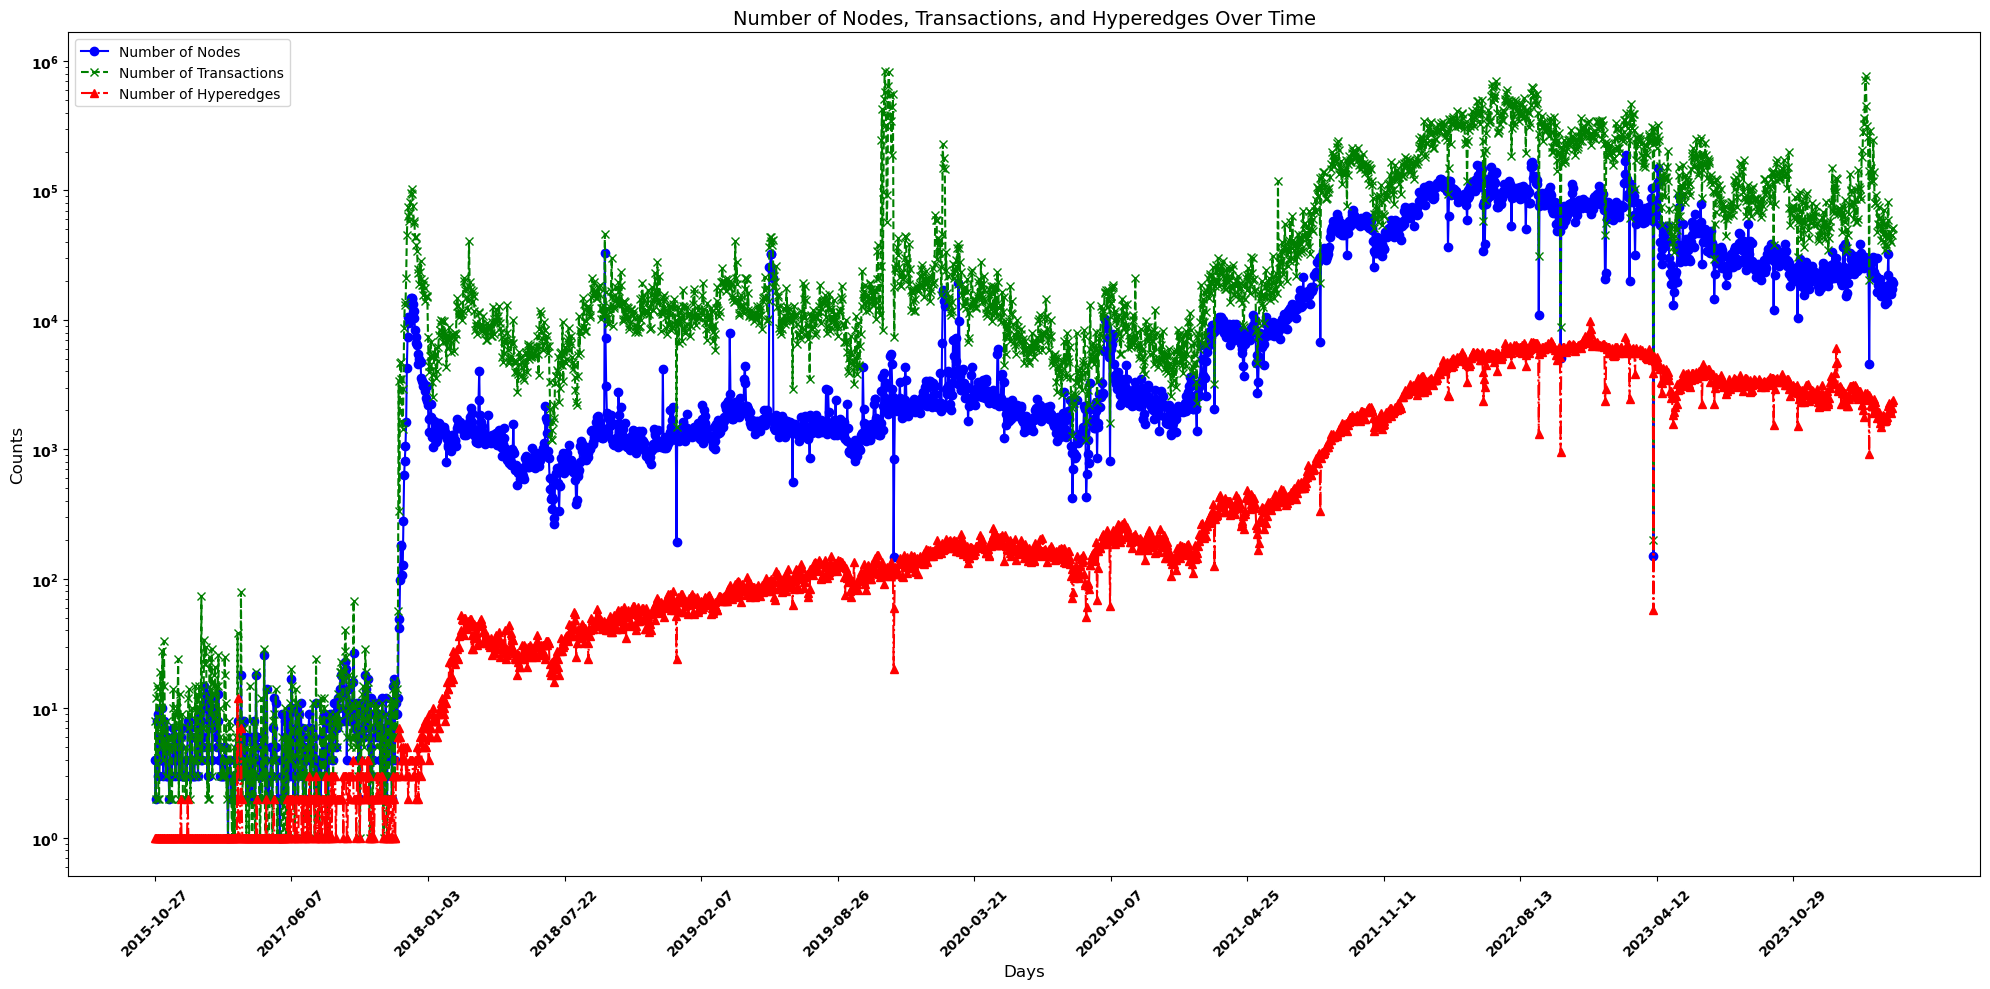

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define paths to your CSV files
nodes_file_path = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/num_nodes_per_day.csv'
transactions_file_path = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/transactions(edges)_day.csv'
hyperedges_file_path = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/num_tokens_per_day.csv'

# Load the CSV files into DataFrames
nodes_df = pd.read_csv(nodes_file_path)
transactions_df = pd.read_csv(transactions_file_path)
hyperedges_df = pd.read_csv(hyperedges_file_path)

# Convert the 'Day' column to datetime format
nodes_df['Day'] = pd.to_datetime(nodes_df['Day'])
transactions_df['Day'] = pd.to_datetime(transactions_df['Day'])
hyperedges_df['Day'] = pd.to_datetime(hyperedges_df['Day'])

# Merge the DataFrames on 'Day' column
combined_df = pd.merge(nodes_df, transactions_df, on='Day', how='outer', suffixes=('_nodes', '_transactions'))
combined_df = pd.merge(combined_df, hyperedges_df, on='Day', how='outer')
combined_df.rename(columns={'Number of Hyperedges': 'Number of Hyperedges'}, inplace=True)

# Sort by 'Day' column
combined_df.sort_values(by='Day', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(combined_df))  # Index based on the length of the data

# Plotting the combined data
plt.figure(figsize=(20, 10))  # Set figure size

# Plot each metric with different colors
plt.plot(days_index, combined_df['Number of Nodes'].values, marker='o', linestyle='-', color='b', label='Number of Nodes')
plt.plot(days_index, combined_df['Number of Transactions'].values, marker='x', linestyle='--', color='g', label='Number of Transactions')
plt.plot(days_index, combined_df['Number of Hyperedges'].values, marker='^', linestyle='-.', color='r', label='Number of Hyperedges')

# Set x-axis labels every 200 days
step_size = 200  # Set the step size for x-axis labels
selected_indices = list(range(0, len(combined_df), step_size))  # Select indices spaced by step_size

# Set x-axis ticks and labels
plt.xticks(
    ticks=selected_indices,
    labels=combined_df['Day'].dt.strftime('%Y-%m-%d').iloc[selected_indices],  # Format the date labels
    rotation=45,
    fontsize=10,
    fontweight='bold'
)

plt.yticks(fontweight='bold')


# Set labels and title
plt.xlabel('Days', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Number of Nodes, Transactions, and Hyperedges Over Time', fontsize=14)


plt.yscale('log')

# Remove grid lines
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


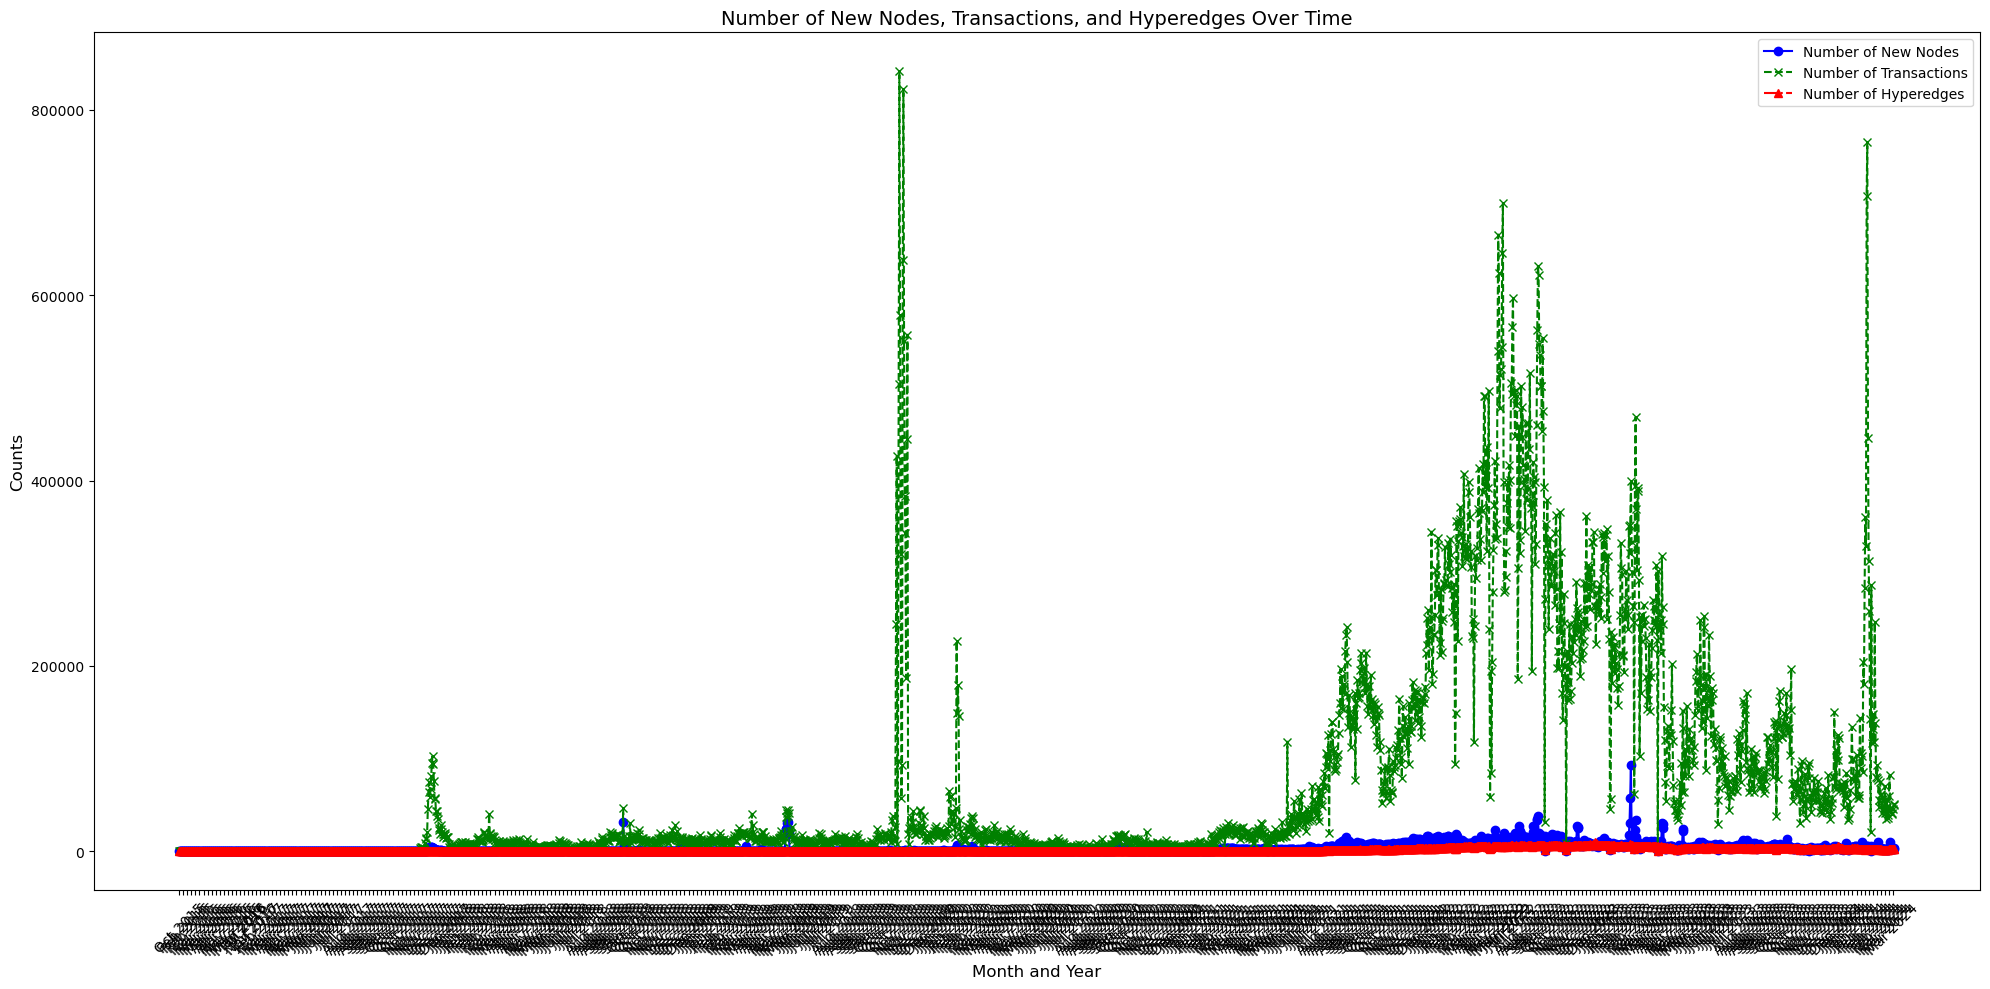

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define paths to your CSV files
nodes_file_path = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/new_nodes.csv'
transactions_file_path = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/transactions(edges)_day.csv'
hyperedges_file_path = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/num_tokens_per_day.csv'

# Load the CSV files into DataFrames
nodes_df = pd.read_csv(nodes_file_path)
transactions_df = pd.read_csv(transactions_file_path)
hyperedges_df = pd.read_csv(hyperedges_file_path)

# Convert the 'Day' column to datetime format
nodes_df['Day'] = pd.to_datetime(nodes_df['Day'])
transactions_df['Day'] = pd.to_datetime(transactions_df['Day'])
hyperedges_df['Day'] = pd.to_datetime(hyperedges_df['Day'])

# Merge the DataFrames on 'Day' column
combined_df = pd.merge(nodes_df, transactions_df, on='Day', how='outer', suffixes=('_nodes', '_transactions'))
combined_df = pd.merge(combined_df, hyperedges_df, on='Day', how='outer')
combined_df.rename(columns={'Number of Hyperedges': 'Number of Hyperedges'}, inplace=True)

# Sort by 'Day' column
combined_df.sort_values(by='Day', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(combined_df))  # Index based on the length of the data

# Plotting the combined data
plt.figure(figsize=(20, 10))  # Set figure size

# Plot each metric with different colors
plt.plot(days_index, combined_df['Number of New Nodes'].values, marker='o', linestyle='-', color='b', label='Number of New Nodes')
plt.plot(days_index, combined_df['Number of Transactions'].values, marker='x', linestyle='--', color='g', label='Number of Transactions')
plt.plot(days_index, combined_df['Number of Hyperedges'].values, marker='^', linestyle='-.', color='r', label='Number of Hyperedges')

# Set x-axis labels with month and year
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Ensure integer locations for ticks
plt.xticks(
    ticks=days_index[::6],  # Adjust the step size for x-axis ticks, e.g., every 6 months
    labels=combined_df['Day'].dt.strftime('%b %Y').iloc[::6],  # Format the date labels as month and year
    rotation=45,
    fontsize=10
)

# Set labels and title
plt.xlabel('Month and Year', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Number of New Nodes, Transactions, and Hyperedges Over Time', fontsize=14)

# Remove grid lines
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()
